$$\textbf{Monte Carlo Simulation}$$

Monte Carlo simulation is a powerful technique used to estimate statistical properties of complex systems or functions through repeated random sampling. In this document, we detail the Monte Carlo simulation performed on two sets of functions: the first set using the function $g(x) $ and the second set using the function $h(x) $. The simulation estimates the mean and variance of three different estimators for each function.

In [ ]:
# Import basic packages
import numpy as np
from numpy import random
import matplotlib.pyplot as plt

from tqdm.auto import tqdm

# I. Simulation for the Function $g(x) $


The original function of interest is defined as:
$$
g(x) = \frac{\sinh\left(\frac{1}{3} + \sqrt{x}\right)}{\sinh\left(\frac{1}{3} + 1\right)}
$$
where $\sinh $ denotes the hyperbolic sine function. This function is normalized to ensure that its values lie within the interval $[0, 1]$.

In [ ]:
# Function to calculate the mean of a list
def Mean(x):
  return np.mean(np.array(x))

# Function to calculate the variance of a list
def Var(x):
  return np.var(np.array(x))

# Normalized function g(x)
def g(x):
    return np.sinh((1/3) + np.sqrt(x)) / np.sinh((1/3) + 1)

## Estimators

Three estimators are used to approximate the properties of $g(x)$:


- $\textbf{Estimator $U $}$: This estimator checks if a random value $y$ is less than or equal to $g(x) $. Mathematically,

   $$
    U(x, y) = \begin{cases}
    1 & \text{if } y \leq g(x) \\
    0 & \text{otherwise}
    \end{cases}
   $$
    
- $\textbf{Estimator $V $}$: This estimator directly returns the value of $g(x) $, i.e.,

    $$V(x) = g(x)$$

- $\textbf{Estimator $W $}$: This estimator computes the average of $g(x) $ and $g(1-x)$:

    $$W(x) = \frac{g(x) + g(1 - x)}{2}$$


In [ ]:
# Function V that returns g(x)
def V(x):
  return g(x)

# Function U that checks if y is less than or equal to g(x)
def U(x, y):
    if y <= g(x):
        return 1
    return 0

# Function W that averages g(x) and g(1-x)
def W(x):
  return (g(x) + g(1 - x)) / 2

##Simulation Procedure

For each sample size $N $, the simulation involves:
- Generating $N $ random samples from a uniform distribution between 0 and 1.
- Calculating the values for each estimator using these samples.
- Estimating the mean and variance for each estimator.



In [ ]:
# Create a range of sample sizes from 200 to 100000
N_values = np.linspace(200, 100000, 1000, endpoint=True)

# Lists to store mean and variance values for different estimators
u_mean = []  # Mean for estimator U
u_var = []   # Variance for estimator U
v_mean = []  # Mean for estimator V
v_var = []   # Variance for estimator V
w_mean = []  # Mean for estimator W
w_var = []   # Variance for estimator W

# Loop over different sample sizes
for i in tqdm(range(len(N_values))):
  u_values = []
  v_values = []
  w_values = []

  # Generate random samples and compute estimators
  for j in range(int(N_values[i])):
    u_values.append(U(np.random.uniform(0, 1), np.random.uniform(0, 1)))  # Estimation using U
    v_values.append(V(np.random.uniform(0, 1)))                           # Estimation using V
    w_values.append(W(np.random.uniform(0, 1)))                           # Estimation using W

  # Compute mean and variance for each estimator and denormalize
  u_mean.append(Mean(u_values) * np.sinh((1/3) + 1))
  u_var.append((Var(u_values) / int(N_values[i])) * (np.sinh((1/3) + 1)) ** 2)

  v_mean.append(Mean(v_values) * np.sinh((1/3) + 1))                                # Denormalization
  v_var.append((Var(v_values) / int(N_values[i])) * (np.sinh((1/3) + 1)) ** 2)      # Denormalization

  w_mean.append(Mean(w_values) * np.sinh((1/3) + 1))
  w_var.append((Var(w_values) / int(N_values[i])) * (np.sinh((1/3) + 1)) ** 2)


  0%|          | 0/1000 [00:00<?, ?it/s]

##Results

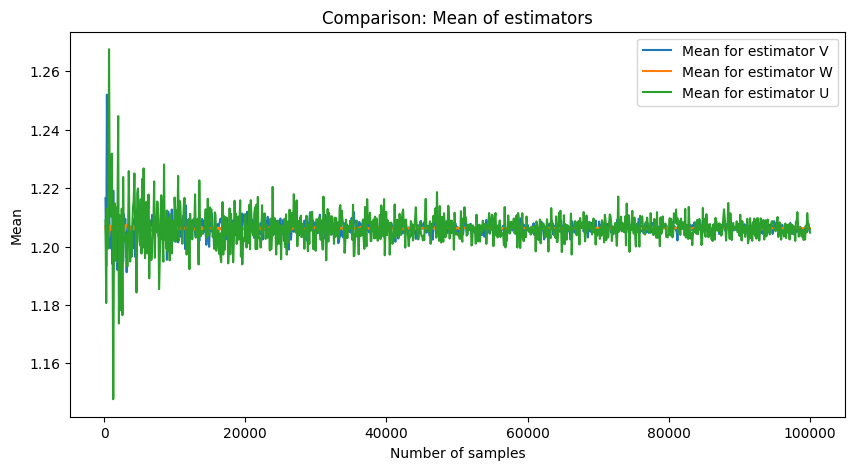

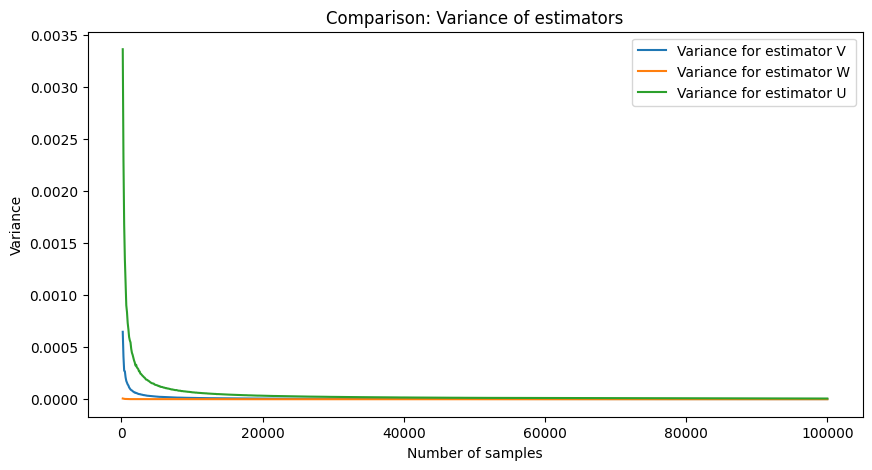

In [ ]:
# Plot comparison of means for the estimators
plt.figure(figsize=(10, 5))
plt.plot(N_values, v_mean, label="Mean for estimator V")
plt.plot(N_values, w_mean, label="Mean for estimator W")
plt.plot(N_values, u_mean, label="Mean for estimator U")
plt.xlabel("Number of samples")
plt.ylabel("Mean")
plt.title("Comparison: Mean of estimators")
plt.legend()
plt.show()

# Plot comparison of variances for the estimators
plt.figure(figsize=(10, 5))

plt.plot(N_values, v_var, label="Variance for estimator V")
plt.plot(N_values, w_var, label="Variance for estimator W")
plt.plot(N_values, u_var, label="Variance for estimator U")
plt.xlabel("Number of samples")
plt.ylabel("Variance")
plt.title("Comparison: Variance of estimators")
plt.legend()
plt.show()

The results are visualized in two plots:

- The first plot shows the comparison of means for estimators $U $, $V $, and $W $ as a function of sample size.
- The second plot shows the comparison of variances for these estimators.


# Simulation for the Function $h(x)$

The second function is defined as:
$$
h(x) = \frac{\left(\log\left(1 + 3 x^{3.2}\right)\right)^{\frac{1}{4}}}{\left(\log\left(1 + 3 \cdot 1^{3.2}\right)\right)^{\frac{1}{4}}}
$$


This function is also normalized to ensure that its values lie within the interval $[0, 1]$.






In [ ]:
# Normalized function h(x)
def h(x):
    return (np.log(1 + 3 * x**3.2) ** (1/4)) / (np.log(1 + 3 * 1**3.2) ** (1/4))
    # Normalization ensures values lie within [0, 1].


##Estimators

For $h(x) $, the estimators are similar to those used for $g(x) $:


   - $\textbf{Estimator $U1 $}$: Defined as:
   $$
    U1(x, y) = \begin{cases}
    1 & \text{if } y \leq h(x) \\
    0 & \text{otherwise}
    \end{cases}
   $$
    
   - $\textbf{Estimator $V1 $}$: Directly returns the value of $h(x) $:
   $$
    V1(x) = h(x)
   $$


   - $\textbf{Estimator $W1 $}$: Computes the average of $h(x) $ and $h(1-x) $:
   $$
    W1(x) = \frac{h(x) + h(1 - x)}{2}
   $$


In [ ]:
# Function V1 that returns h(x)
def V1(x):
  return h(x)

# Function U1 that checks if y is less than or equal to h(x)
def U1(x, y):
    if y <= h(x):
        return 1
    return 0

# Function W1 that averages h(x) and h(1-x)
def W1(x):
  return (h(x) + h(1 - x)) / 2


##Simulation Procedure

The procedure for estimating the properties of $h(x) $ is analogous to that for $g(x) $, with:

   - Generating $N $ random samples.
   - Calculating values for each estimator.
   - Estimating means and variances.

In [ ]:
# Create a range of sample sizes for h(x) estimators
N_values1 = np.linspace(200, 100000, 1000, endpoint=True)

# Lists to store mean and variance values for the new estimators
u_mean1 = []  # Mean for estimator U1
u_var1 = []   # Variance for estimator U1
v_mean1 = []  # Mean for estimator V1
v_var1 = []   # Variance for estimator V1
w_mean1 = []  # Mean for estimator W1
w_var1 = []   # Variance for estimator W1

# Loop over different sample sizes for h(x) estimators
for i in tqdm(range(len(N_values1))):
  u_values1 = []
  v_values1 = []
  w_values1 = []

  # Generate random samples and compute estimators for h(x)
  for j in range(int(N_values1[i])):
    u_values1.append(U1(np.random.uniform(0, 1), np.random.uniform(0, 1)))  # Estimation using U1
    v_values1.append(V1(np.random.uniform(0, 1)))                           # Estimation using V1
    w_values1.append(W1(np.random.uniform(0, 1)))                           # Estimation using W1

  # Compute mean and variance for each estimator of h(x) and denormalize
  u_mean1.append(Mean(u_values1) * (np.log(1 + 3 * 1**3.2) ** (1/4)))
  u_var1.append((Var(u_values1) / int(N_values1[i])) * (np.log(1 + 3 * 1**3.2) ** (1/4)) ** 2)

  v_mean1.append(Mean(v_values1) * (np.log(1 + 3 * 1**3.2) ** (1/4)))                                # Denormalization
  v_var1.append((Var(v_values1) / int(N_values1[i])) * (np.log(1 + 3 * 1**3.2) ** (1/4)) ** 2)       # Denormalization

  w_mean1.append(Mean(w_values1) * (np.log(1 + 3 * 1**3.2) ** (1/4)))
  w_var1.append((Var(w_values1) / int(N_values1[i])) * (np.log(1 + 3 * 1**3.2) ** (1/4)) ** 2)

  0%|          | 0/1000 [00:00<?, ?it/s]



##Results

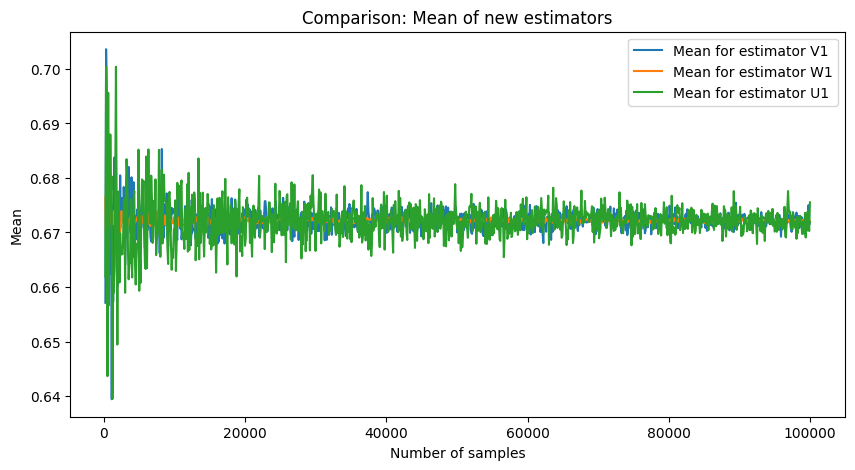

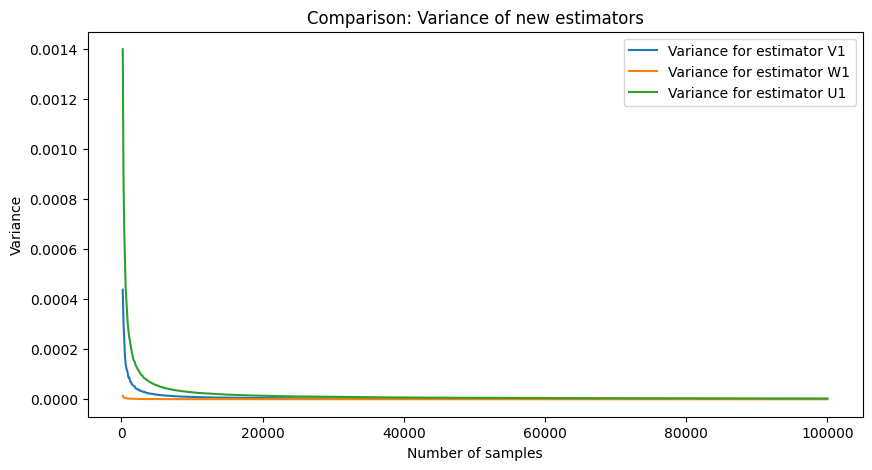

In [ ]:
# Plot comparison of means for the new set of estimators
plt.figure(figsize=(10, 5))
plt.plot(N_values, v_mean1, label="Mean for estimator V1")
plt.plot(N_values, w_mean1, label="Mean for estimator W1")
plt.plot(N_values, u_mean1, label="Mean for estimator U1")
plt.xlabel("Number of samples")
plt.ylabel("Mean")
plt.title("Comparison: Mean of new estimators")
plt.legend()
plt.show()

# Plot comparison of variances for the new set of estimators
plt.figure(figsize=(10, 5))
plt.plot(N_values, v_var1, label="Variance for estimator V1")
plt.plot(N_values, w_var1, label="Variance for estimator W1")
plt.plot(N_values, u_var1, label="Variance for estimator U1")
plt.xlabel("Number of samples")
plt.ylabel("Variance")
plt.title("Comparison: Variance of new estimators")
plt.legend()
plt.show()

The results for the function $h(x) $ are also visualized in two plots:

   - The first plot compares the means of estimators $U1 $, $V1 $, and $W1 $ as a function of sample size.
   - The second plot compares the variances of these estimators.